In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/Vincent2308/Corporate-Bankruptcy/refs/heads/main/data/clean/taiwan/taiwan.csv"

df= pd.read_csv(url)
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.390923,0.428314,0.435356,0.601457,0.601457,0.998969,0.796887,0.808809,0.302963,...,0.075475,0.728578,0.009219,0.622879,0.601453,0.833419,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.047775,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.028902,0.569389,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796630,0.808600,0.302963,...,0.025346,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.591105,0.591105,0.998700,0.796967,0.808966,0.303350,...,0.067250,0.739555,0.003252,0.622929,0.591105,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.047725,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.026205,0.569389,0.035490


In [164]:
df.info()
df['Bankrupt?'].value_counts(normalize=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 94 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64

### Multicolinearity

We remove highly correlated features.

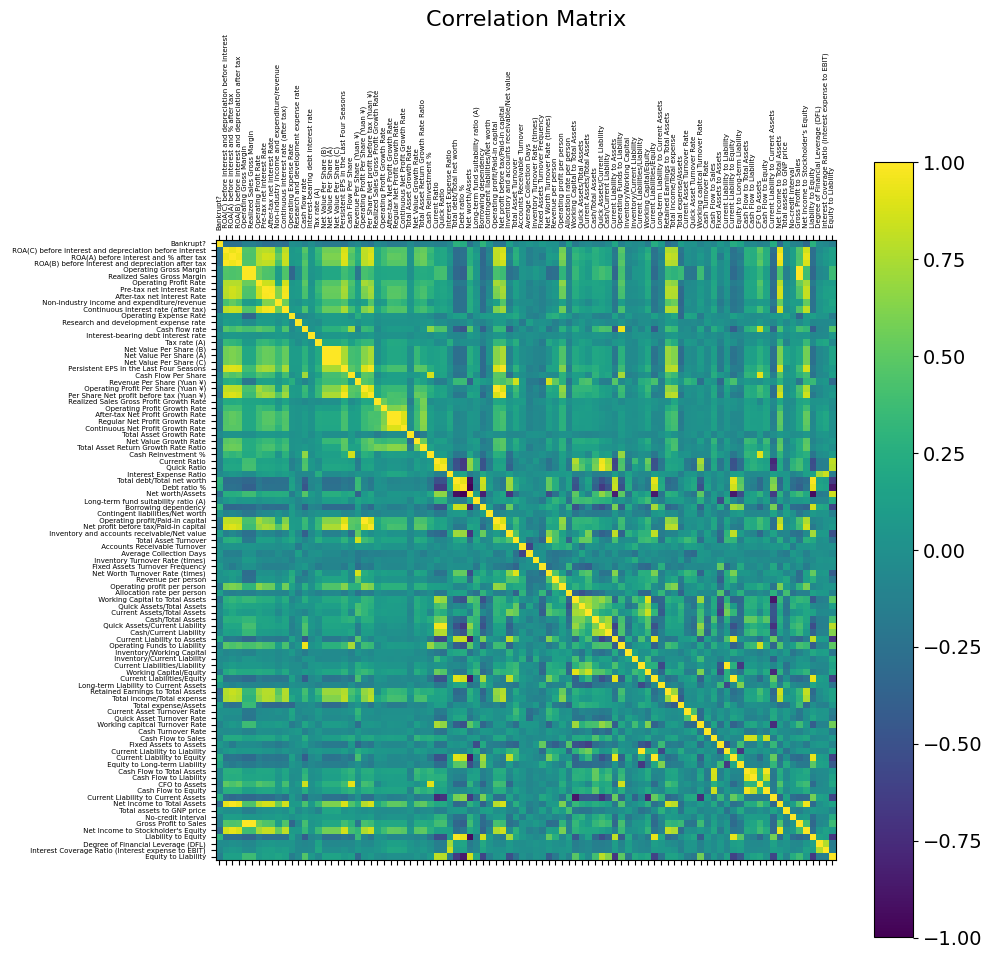

In [165]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=5, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=5)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [166]:
def remove_correlated(df, threshold=0.90):
    corr = df.corr().abs()

    # I used GPT for this part
    # it calculates the upper triangle above the diagonal since that has a corr of 1.
    # this avoids us calculating each correlation twice, since the correlation between A&B = corr B&A.
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

    drop_cols = [c for c in upper.columns if any(upper[c] > threshold)]
    return df.drop(columns=drop_cols), drop_cols


In [167]:
df_reduced, dropped_columns = remove_correlated(df.drop(columns=["Bankrupt?"]))
df_reduced["Bankrupt?"] = df["Bankrupt?"]

df_reduced.head()


,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),...,Fixed Assets to Assets,Equity to Long-term Liability,Cash Flow to Total Assets,Current Liability to Current Assets,Total assets to GNP price,No-credit Interval,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt?
0,0.390923,0.601457,0.998969,0.796887,0.302963,1.256969e-04,0.0,0.458143,0.000725,0.0,...,0.424206,0.126549,0.637555,0.075475,0.009219,0.622879,0.026601,0.564050,0.016469,1
1,0.464291,0.610235,0.998946,0.797380,0.303556,2.897851e-04,0.0,0.461867,0.000647,0.0,...,0.468828,0.120916,0.641100,0.047775,0.008323,0.623652,0.028902,0.569389,0.020794,1
2,0.426071,0.601450,0.998857,0.796630,0.302963,2.361297e-04,25500000.0,0.458521,0.000790,0.0,...,0.276179,0.117922,0.642765,0.025346,0.040003,0.623841,0.026555,0.563706,0.016474,1
3,0.399844,0.591105,0.998700,0.796967,0.303350,1.078888e-04,0.0,0.465705,0.000449,0.0,...,0.559144,0.120760,0.579039,0.067250,0.003252,0.622929,0.026697,0.564663,0.023982,1
4,0.465022,0.598783,0.998973,0.797366,0.303475,7.890000e+09,0.0,0.462746,0.000686,0.0,...,0.309555,0.110933,0.622374,0.047725,0.003878,0.623521,0.026205,0.569389,0.035490,1


#### Frim size


In [168]:
firm_size = " Total assets to GNP price"

df_reduced["log_size"] = np.log1p(df_reduced[firm_size])

df_reduced["size_group"] = pd.qcut(df_reduced["log_size"], q=3, labels=["Small", "Medium", "Large"])

df_reduced[["log_size", "size_group"]].head()
df_reduced["size_group"].value_counts()



size_group
Small     2273
Medium    2273
Large     2273
Name: count, dtype: int64

Text(0.5, 1.0, 'Correlation')

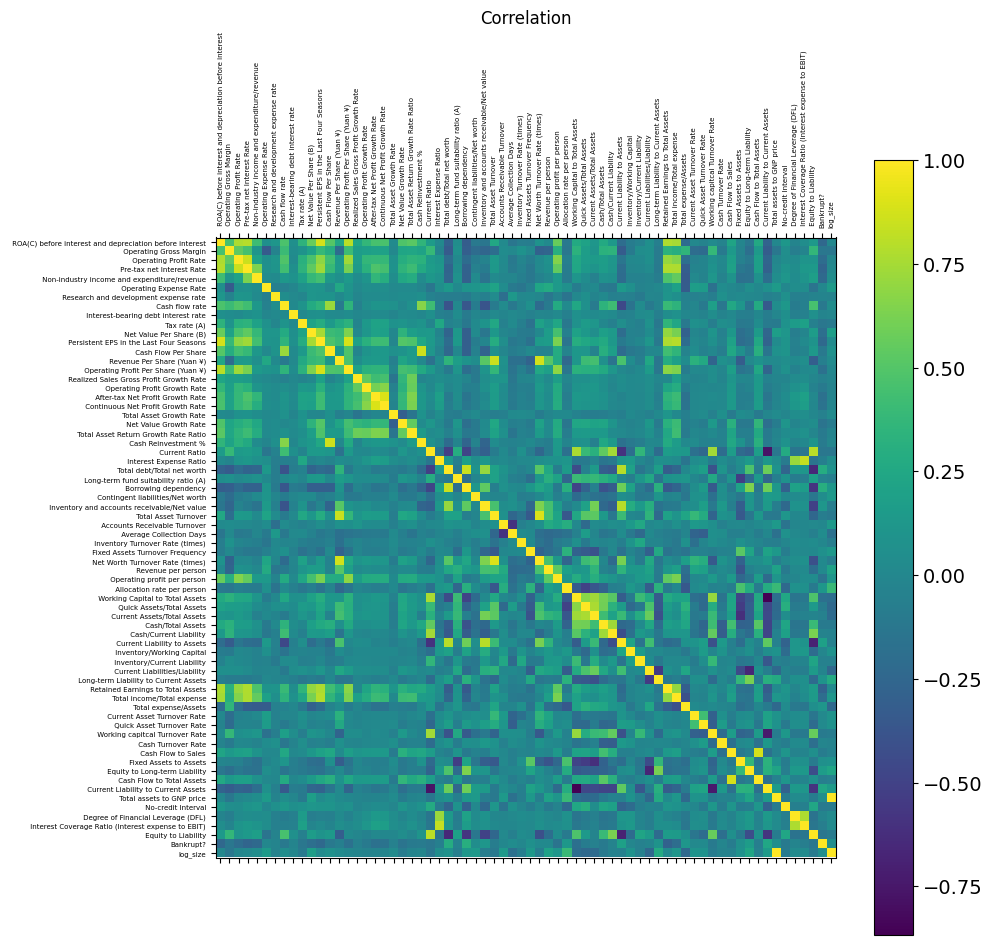

In [169]:
f = plt.figure(figsize=(10, 10))
num_df = df_reduced.select_dtypes(include="number")

plt.matshow(num_df.corr(), fignum=f.number)
plt.xticks(range(num_df.shape[1]), num_df.columns, fontsize=5, rotation=90)
plt.yticks(range(num_df.shape[1]), num_df.columns, fontsize=5)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation')

### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x = df_reduced.drop(columns=["Bankrupt?", "size_group"])
y = df_reduced["Bankrupt?"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42
)

#### Firm size

In [171]:
size_test = df_reduced.loc[x_test.index, "size_group"]

size_test.value_counts()


size_group
Large     475
Small     465
Medium    424
Name: count, dtype: int64

### Scaling

In [172]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc  = scaler.transform(x_test)

### SMOTE

In [173]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 10)
x_train_sc_sm, y_train_sm, = smote.fit_resample(x_train_sc, y_train)

### X.X Early-Warning Indicators
We could maybe add some more ratios, but they will probably have similar variances.

In [174]:
ratios=[" Current Liability to Assets"," Net Income to Total Assets"," Working Capital to Total Assets"," Retained Earnings to Total Assets"]
variance_df = df.groupby("Bankrupt?")[ratios].var()
variance_df


,Current Liability to Assets,Net Income to Total Assets,Working Capital to Total Assets,Retained Earnings to Total Assets
Bankrupt?,,,,
0,0.002101,0.000820,0.002936,0.000215
1,0.002337,0.000828,0.002264,0.000296


In [175]:
key_ratios = [" Working Capital to Total Assets", " Cash Flow to Total Assets", " Total debt/Total net worth"," Total Asset Turnover"]

grouped = df_reduced.groupby("Bankrupt?")[key_ratios]

stats = grouped.agg(["mean", "std", "var"])


var_df = stats.xs("var", axis=1, level=1)
var_df.index = var_df.index.map({0: "Healthy", 1: "Bankrupt"})
var_table = var_df.T
var_table.index.name = "Ratio"
var_table.columns = ["Healthy", "Bankrupt"]
var_table = var_table.round(3)

print(var_table)


mean_df = stats.xs("mean", axis=1, level=1)
std_df  = stats.xs("std", axis=1, level=1)
cv_df = std_df / mean_df
cv_df.index = cv_df.index.map({0: "Healthy", 1: "Bankrupt"})
cv_table = cv_df.T
cv_table.index.name = "Ratio"
cv_table.columns = ["Healthy", "Bankrupt"]
cv_table = cv_table.round(3)

print( cv_table)


                                 Healthy  Bankrupt
Ratio                                             
Working Capital to Total Assets    0.003     0.002
Cash Flow to Total Assets          0.001     0.001
Total debt/Total net worth         0.000     0.000
Total Asset Turnover               0.007     0.006
                                 Healthy  Bankrupt
Ratio                                             
Working Capital to Total Assets    0.066     0.063
Cash Flow to Total Assets          0.057     0.039
Total debt/Total net worth         0.777     0.415
Total Asset Turnover               0.612     0.733


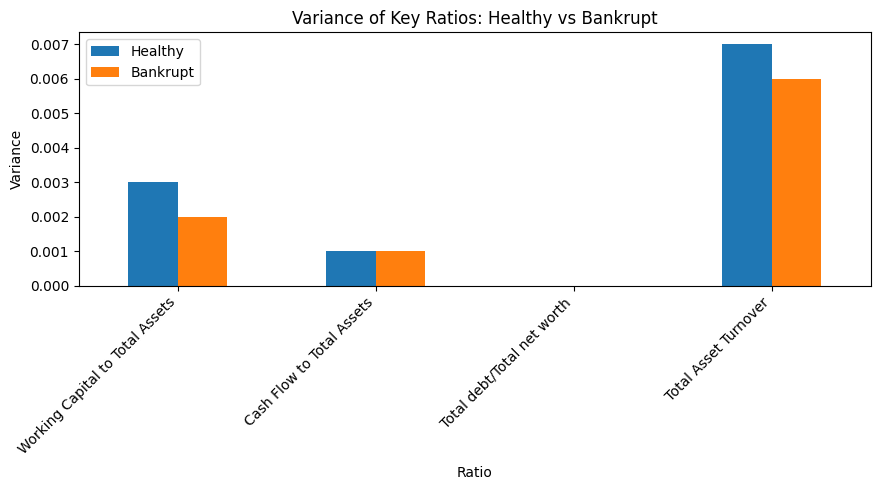

In [176]:
ax = var_table.plot(kind="bar", figsize=(9, 5))
ax.set_ylabel("Variance")
ax.set_title("Variance of Key Ratios: Healthy vs Bankrupt")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Model Evaluation Function

In [177]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay

def evaluate_model(model, x_test_sc, y_test):
    y_pred = model.predict(x_test_sc)
    y_prob = model.predict_proba(x_test_sc)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    print(f'Accuracy: {acc:.3f}')
    print(f'Precision: {pre:.3f}')
    print(f'Recall: {rec:.3f}')
    print(f'F1-Score: {f1:.3f}')
    print(f'AUC Score: {auc:.3f}')

    RocCurveDisplay.from_estimator(model, x_test_sc, y_test)
    plt.show()

## Train Models

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Altman Z-Score

In [179]:
Z = (
    1.2 * df[" Working Capital to Total Assets"] +
    1.4 * df[" Retained Earnings to Total Assets"] +
    3.3 * df[" ROA(A) before interest and % after tax"] +
    1.0 * df[" Total Asset Turnover"]
)
df["Z-score"] = -Z
Z_score = roc_auc_score(y, df["Z-score"])

### Ohlson  O-Score

In [180]:
O = (
    -1.32
    +6.03* df[" Current Liability to Assets"]
    -1.43 * df[" Working Capital to Total Assets"]
    +0.0757 * df[" Current Liability to Current Assets"]
    -1.72 * (df[" Current Liability to Assets"] > 1).astype(int)
    -2.37 * df[" Net Income to Total Assets"]
)
df["O-score"] = O
O_score = roc_auc_score(y, df["O-score"])

### Logistic Regression, without SMOTE

Accuracy: 0.894
Precision: 0.175
Recall: 0.614
F1-Score: 0.273
AUC Score: 0.871


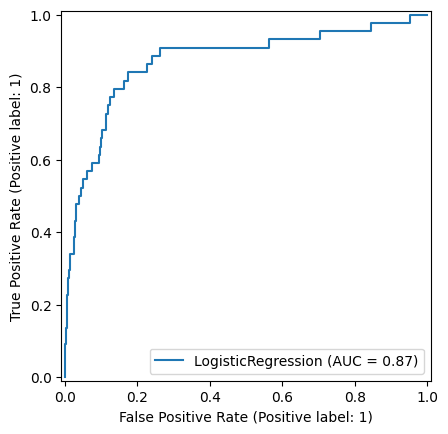

In [181]:
lr = LogisticRegression(max_iter=500, class_weight="balanced")
lr.fit(x_train_sc, y_train)
evaluate_model(lr, x_test_sc, y_test)

### Logistic Regression + SMOTE

Accuracy: 0.905
Precision: 0.193
Recall: 0.614
F1-Score: 0.293
AUC Score: 0.866


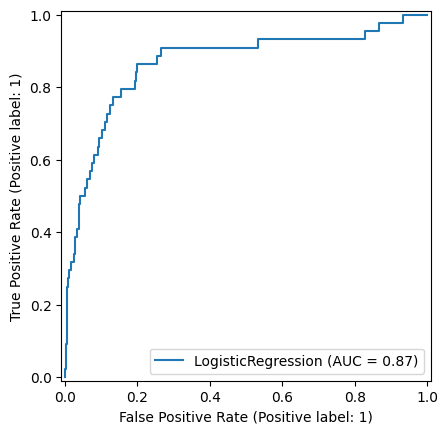

In [182]:
lr_sm = LogisticRegression(max_iter=500)
lr_sm.fit(x_train_sc_sm, y_train_sm)
evaluate_model(lr_sm, x_test_sc, y_test)

### Logistic Regrssion PCA

Accuracy: 0.968
Precision: 0.500
Recall: 0.045
F1-Score: 0.083
AUC Score: 0.874


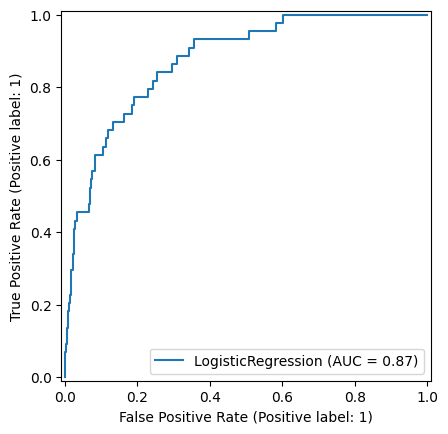

In [183]:
pca = PCA(n_components=1)
x_train_pca = pca.fit_transform(x_train_sc)
x_test_pca = pca.transform(x_test_sc)

lr_pca = LogisticRegression()
lr_pca.fit(x_train_pca, y_train)
evaluate_model(lr_pca, x_test_pca, y_test)

### Logistic Regrssion PCA + SMOTE

Accuracy: 0.554


Precision: 0.063
Recall: 0.932
F1-Score: 0.119
AUC Score: 0.874


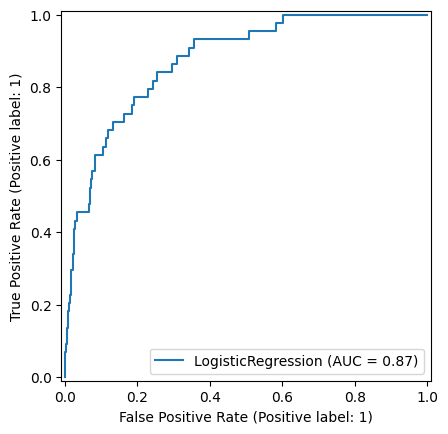

In [184]:
x_train_pca_sm = pca.fit_transform(x_train_sc_sm)
lr_pca_sm = LogisticRegression()
lr_pca_sm.fit(x_train_pca_sm, y_train_sm)
evaluate_model(lr_pca_sm, x_test_pca, y_test)

### Random Forest, without SMOTE


Accuracy: 0.970
Precision: 0.800
Recall: 0.091
F1-Score: 0.163
AUC Score: 0.894


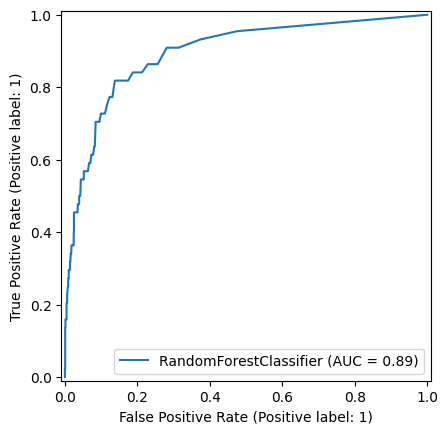

In [ ]:
rf = RandomForestClassifier(n_estimators=500, class_weight="balanced", random_state=42)
rf.fit(x_train_sc, y_train)
evaluate_model(rf, x_test_sc, y_test)

### Random Forest + SMOTE


Accuracy: 0.956
Precision: 0.278
Recall: 0.227
F1-Score: 0.250
AUC Score: 0.900


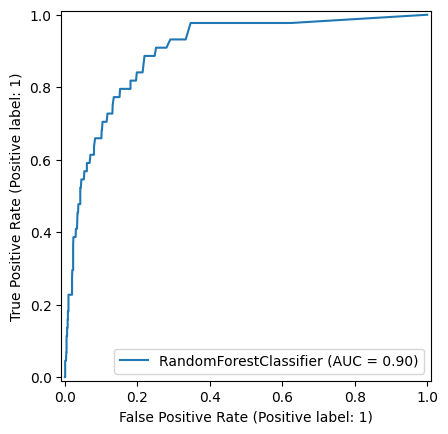

In [ ]:
rf_sm = RandomForestClassifier(n_estimators=500, random_state=42)
rf_sm.fit(x_train_sc_sm, y_train_sm)
evaluate_model(rf_sm, x_test_sc, y_test)

### Random forrest LDA without SMOTE

Accuracy: 0.946
Precision: 0.174
Recall: 0.182
F1-Score: 0.178
AUC Score: 0.717


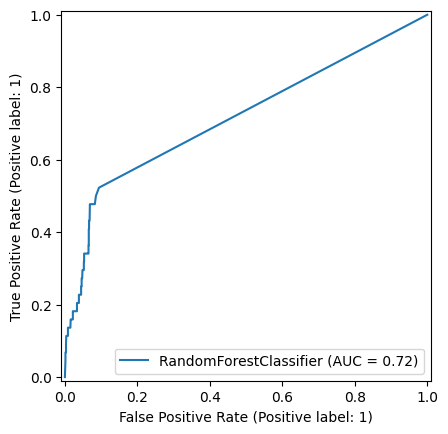

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(x_train_sc, y_train)
X_test_lda = lda.transform(x_test_sc)

rf_lda = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1)
rf_lda.fit(X_train_lda, y_train)
evaluate_model(rf_lda, X_test_lda, y_test)

### Random forrest LDA + SMOTE

Accuracy: 0.605
Precision: 0.063
Recall: 0.818
F1-Score: 0.118
AUC Score: 0.823


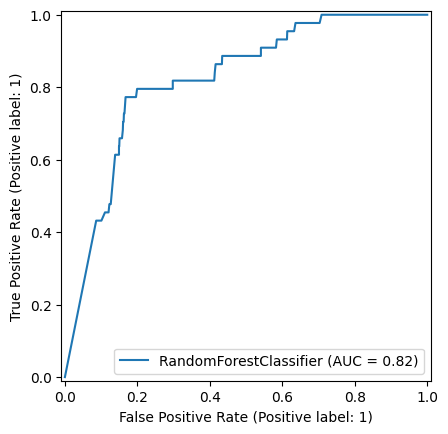

In [ ]:
X_train_lda_sm = lda.fit_transform(x_train_sc_sm, y_train_sm)
rf_lda_sm = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1)
rf_lda_sm.fit(X_train_lda_sm, y_train_sm)
evaluate_model(rf_lda_sm, X_test_lda, y_test)

### K-Nearest Neighbors, without SMOTE

Accuracy: 0.966
Precision: 0.364
Recall: 0.091
F1-Score: 0.145
AUC Score: 0.655


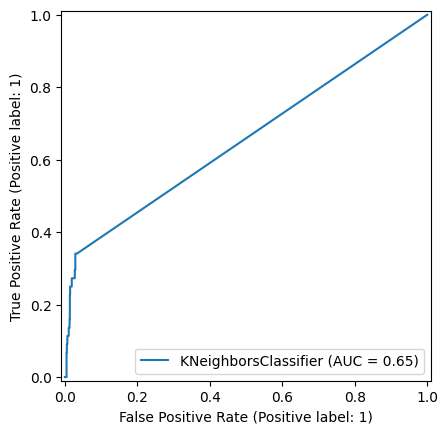

Accuracy: 0.968
Precision: 0.000
Recall: 0.000
F1-Score: 0.000
AUC Score: 0.851


c:\Users\mb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


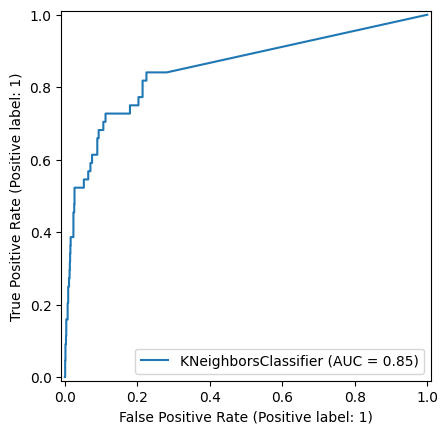

In [189]:
knn = {}
for k in [3, 99]:
    model = KNeighborsClassifier(n_neighbors=k, weights='distance', n_jobs=-1)
    model.fit(x_train_sc, y_train)
    knn[str(k)] = model
    evaluate_model(knn[str(k)], x_test_sc, y_test)

### K-Nearest Neighbors + SMOTE

Accuracy: 0.913
Precision: 0.162
Recall: 0.409
F1-Score: 0.232
AUC Score: 0.717


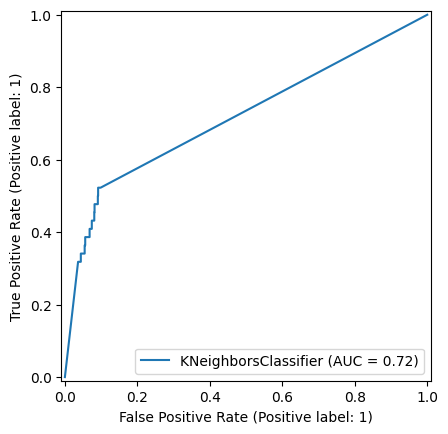

Accuracy: 0.837
Precision: 0.132
Recall: 0.727
F1-Score: 0.223
AUC Score: 0.874


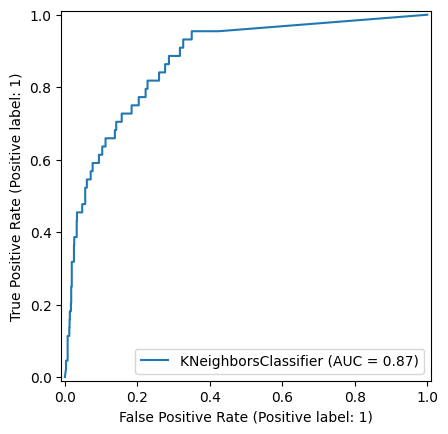

In [190]:
knn_sm = {}
for k in [3, 99]:
    model = KNeighborsClassifier(n_neighbors=k, weights='distance', n_jobs=-1)
    model.fit(x_train_sc_sm, y_train_sm)
    knn_sm[str(k)] = model
    evaluate_model(knn_sm[str(k)], x_test_sc, y_test)

### XGBoost, without SMOTE


Accuracy: 0.971
Precision: 0.643
Recall: 0.205
F1-Score: 0.310
AUC Score: 0.899


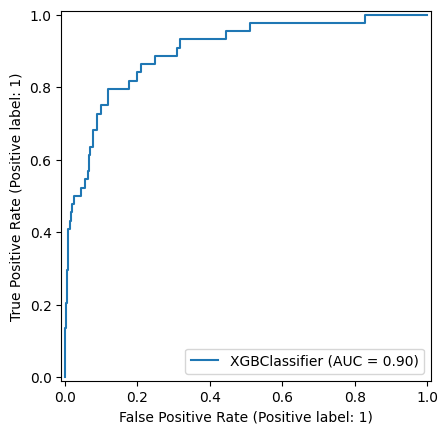

In [ ]:
xgb = XGBClassifier(eval_metric="logloss", random_state=42)
xgb.fit(x_train_sc, y_train)
evaluate_model(xgb, x_test_sc, y_test)

### XGBoost + SMOTE


Accuracy: 0.963
Precision: 0.417
Recall: 0.341
F1-Score: 0.375
AUC Score: 0.900


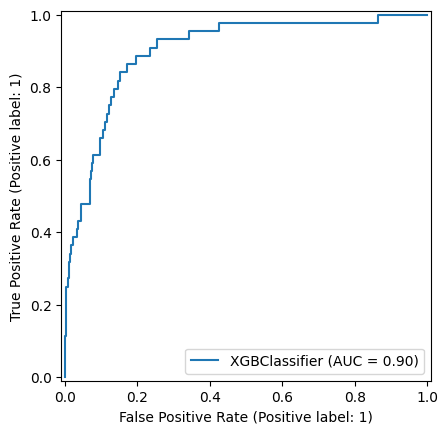

In [ ]:
xgb_sm = XGBClassifier(eval_metric="logloss", random_state=42)
xgb_sm.fit(x_train_sc_sm, y_train_sm)
evaluate_model(xgb_sm, x_test_sc, y_test)

### Feature Importance

In [193]:
coefficients = lr.coef_[0]
odds_ratios = np.exp(coefficients)

coefficients_df = pd.DataFrame({
'Feature' : x.columns,
"Coefficients" : coefficients,
"Odds ratio" : odds_ratios
})

print(coefficients_df.sort_values(by="Coefficients", ascending=False))
coefficients_df.head(15)

fi_rf = pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)
fi_rf.head(15)

fi_xgb = pd.Series(xgb.feature_importances_,index=x.columns).sort_values(ascending=False)
fi_xgb.head(15)

                                     Feature  Coefficients  Odds ratio
14       Operating Profit Per Share (Yuan ¥)      1.476553    4.377828
3                  Pre-tax net Interest Rate      1.200119    3.320512
39           Working Capital to Total Assets      1.118725    3.060948
25                Total debt/Total net worth      0.832218    2.298412
47             Current Liabilities/Liability      0.819187    2.268654
..                                       ...           ...         ...
13                Revenue Per Share (Yuan ¥)     -1.073703    0.341741
42                         Cash/Total Assets     -1.124866    0.324696
8        Interest-bearing debt interest rate     -1.177649    0.308002
65                       Equity to Liability     -1.393596    0.248181
11   Persistent EPS in the Last Four Seasons     -2.010777    0.133885

[67 rows x 3 columns]


Net Value Growth Rate                                      0.164274
Total debt/Total net worth                                 0.074831
Pre-tax net Interest Rate                                  0.062173
Retained Earnings to Total Assets                          0.049195
Persistent EPS in the Last Four Seasons                    0.048562
Borrowing dependency                                       0.042744
Cash/Total Assets                                          0.022825
Cash flow rate                                             0.021482
Current Asset Turnover Rate                                0.020826
Operating Profit Rate                                      0.019576
Operating Profit Growth Rate                               0.016139
Net Worth Turnover Rate (times)                            0.015542
Degree of Financial Leverage (DFL)                         0.015492
ROA(C) before interest and depreciation before interest    0.014445
Operating Profit Per Share (Yuan ¥)             

## Model Comparisons

In [194]:
reduced_results = []

def add_result(name, model, data):
    # evaluate the mdodel based on the previoulsy chosen metrics
    y_pred = model.predict(data)

    # gets the predicted probability the the sample belongs to bankrupt = 1
    y_prob = model.predict_proba(data)[:,1]

    reduced_results.append({"Model": name,"Auc": roc_auc_score(y_test, y_prob),
        "Recall": recall_score(y_test, y_pred),"Precision": precision_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred)
    })

reduced_results.append({
    "Model": "Altman Z-score",
    "Auc": Z_score,
    "Recall": np.nan,
    "Precision": np.nan,
    "F1": np.nan
})

reduced_results.append({
    "Model": "Ohlson O-score",
    "Auc": O_score,
    "Recall": np.nan,
    "Precision": np.nan,
    "F1": np.nan
})

add_result("Logistic regression", lr, x_test_sc)
add_result("Logistic regression (SMOTE)", lr_sm, x_test_sc)

add_result("RandomForest", rf, x_test_sc)
add_result("RandomForest (SMOTE)", rf_sm, x_test_sc)

add_result("XGBoost", xgb, x_test_sc)
add_result("XGBoost (SMOTE)", xgb_sm, x_test_sc)

add_result("KNN k=3", knn["3"], x_test_sc)
add_result("KNN k=3 (SMOTE)", knn_sm["3"], x_test_sc)

add_result("KNN k=99", knn["99"], x_test_sc)
add_result("KNN k=99 (SMOTE)", knn_sm["99"], x_test_sc)

add_result("Logistic regression PCA", lr_pca, x_test_pca)
add_result("Logistic regression PCA (SMOTE)", lr_pca_sm, x_test_pca)

add_result("Random forrest LDA", rf_lda, X_test_lda)
add_result("Random forrest LDA (SMOTE)", rf_lda_sm, X_test_lda)

print(knn["3"], knn["99"])


c:\Users\mb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


KNeighborsClassifier(n_jobs=-1, n_neighbors=3, weights='distance') KNeighborsClassifier(n_jobs=-1, n_neighbors=99, weights='distance')


                              Model       Auc    Recall  Precision        F1
0                    Altman Z-score  0.884470       NaN        NaN       NaN
1                    Ohlson O-score  0.847072       NaN        NaN       NaN
2               Logistic regression  0.871281  0.613636   0.175325  0.272727
3       Logistic regression (SMOTE)  0.865995  0.613636   0.192857  0.293478
4                      RandomForest  0.894189  0.090909   0.800000  0.163265
5              RandomForest (SMOTE)  0.900164  0.227273   0.277778  0.250000
6                           XGBoost  0.899001  0.204545   0.642857  0.310345
7                   XGBoost (SMOTE)  0.899948  0.340909   0.416667  0.375000
8                           KNN k=3  0.654735  0.090909   0.363636  0.145455
9                   KNN k=3 (SMOTE)  0.717476  0.409091   0.162162  0.232258
10                         KNN k=99  0.851059  0.000000   0.000000  0.000000
11                 KNN k=99 (SMOTE)  0.874019  0.727273   0.131687  0.222997

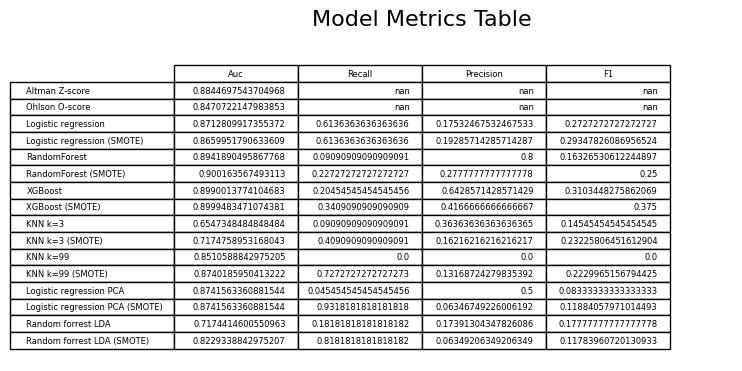

In [195]:
metrics_table = pd.DataFrame(reduced_results)
metrics_table_display = metrics_table[['Model', 'Auc', 'Recall', 'Precision', 'F1']]
metrics_table_display.set_index('Model', inplace=True)

plt.figure(figsize=(8, 4))
plt.axis('off')
plt.title("Model Metrics Table", fontsize=16, pad=20)
from pandas.plotting import table
table(plt.gca(), metrics_table_display, loc='center', colWidths=[0.2]*len(metrics_table_display.columns))

print(metrics_table)
plt.show()



### All models AUC Comparison

The AUC scores comparison shows which models were able to most correctly rank companies by bankruptcy risk, thus indicating their effectiveness in separating bankrupt firms from non-bankrupt firms across the entire distribution of predicted risk.

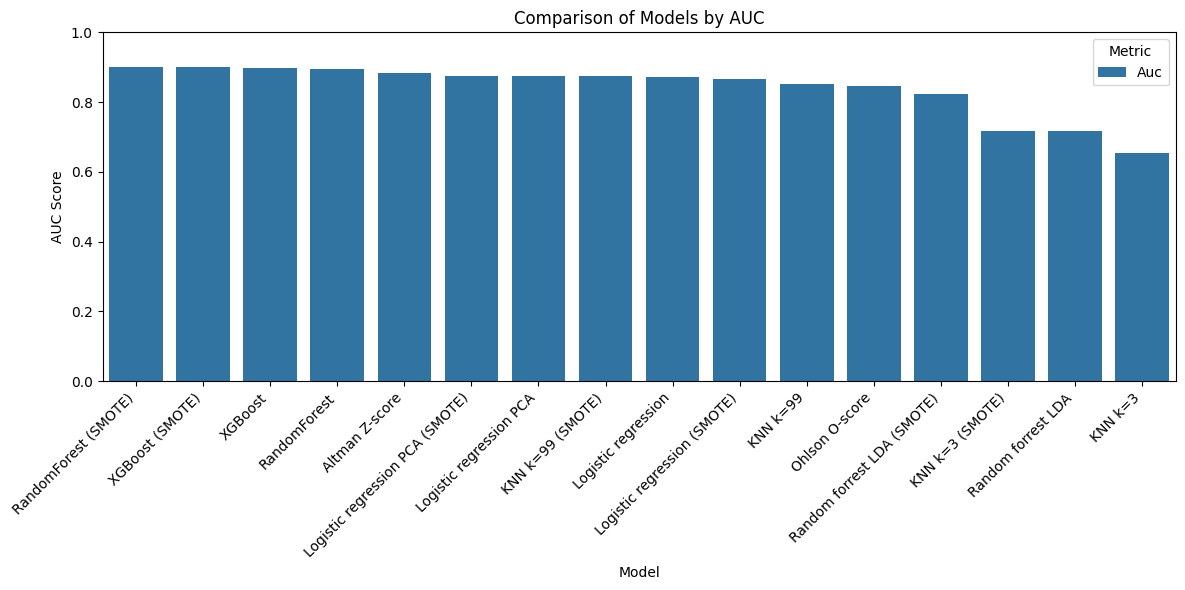

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics_melted = metrics_table.melt(
    id_vars="Model",
    value_vars=["Auc"],
    var_name="Metric",
    value_name="Value"
)

model_order = (
    metrics_table
    .sort_values("Auc", ascending=False)["Model"]
    .tolist()
)

plt.figure(figsize=(12, 6))
sns.barplot(
    x="Model",
    y="Value",
    hue="Metric",
    data=metrics_melted,
    order=model_order
)

plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)
plt.title("Comparison of Models by AUC")
plt.ylabel("AUC Score")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

### Models Across Metrics


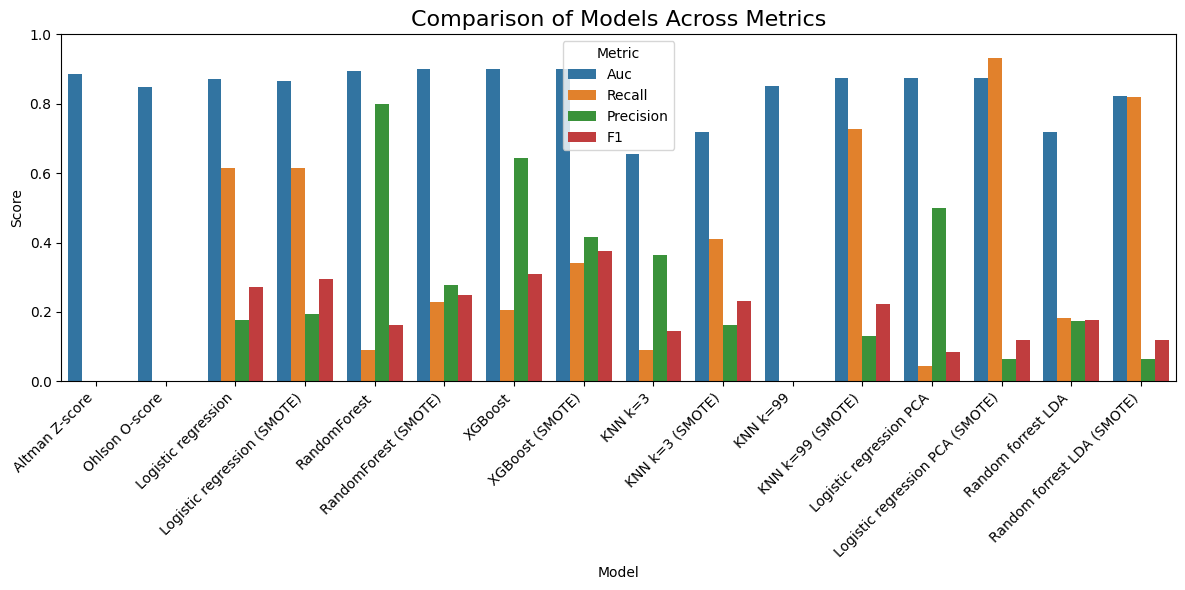

In [197]:
metrics_melted = metrics_table.melt(id_vars="Model", value_vars=["Auc", "Recall", "Precision", "F1"], 
                                    var_name="Metric", value_name="Value")

plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Value", hue="Metric", data=metrics_melted)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.title("Comparison of Models Across Metrics", fontsize=16)
plt.ylabel("Score")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

### ROC and Precision-Recall curves

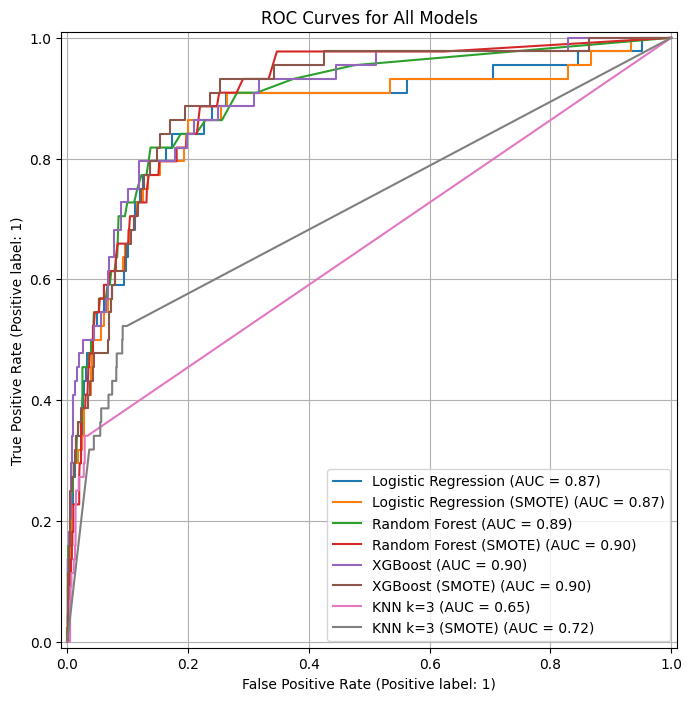

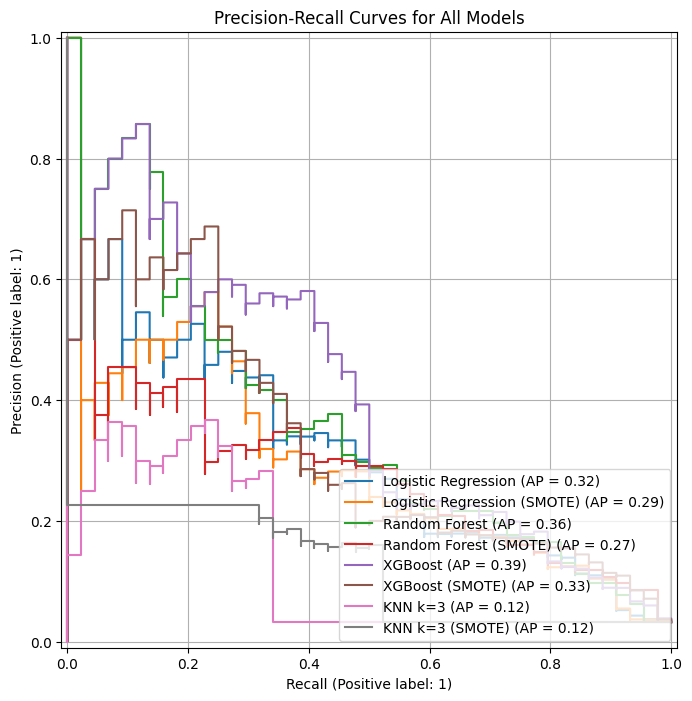

In [198]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

# Define models and labels
models = {
    "Logistic Regression": lr,
    "Logistic Regression (SMOTE)": lr_sm,
    "Random Forest": rf,
    "Random Forest (SMOTE)": rf_sm,
    "XGBoost": xgb,
    "XGBoost (SMOTE)": xgb_sm,
    "KNN k=3": knn["3"],
    "KNN k=3 (SMOTE)": knn_sm["3"]
}

# ROC Curves
plt.figure(figsize=(10, 8))
for name, model in models.items():
    y_prob = model.predict_proba(x_test_sc)[:,1]
    RocCurveDisplay.from_predictions(y_test, y_prob, name=name, ax=plt.gca())

plt.title("ROC Curves for All Models")
plt.grid(True)
plt.legend(loc='lower right', fontsize=10)
plt.show()

# Precision-Recall Curves
plt.figure(figsize=(10, 8))
for name, model in models.items():
    y_prob = model.predict_proba(x_test_sc)[:,1]
    PrecisionRecallDisplay.from_predictions(y_test, y_prob, name=name, ax=plt.gca())

plt.title("Precision-Recall Curves for All Models")
plt.grid(True)
plt.legend(loc='lower right', fontsize=10)
plt.show()


### Feature importance

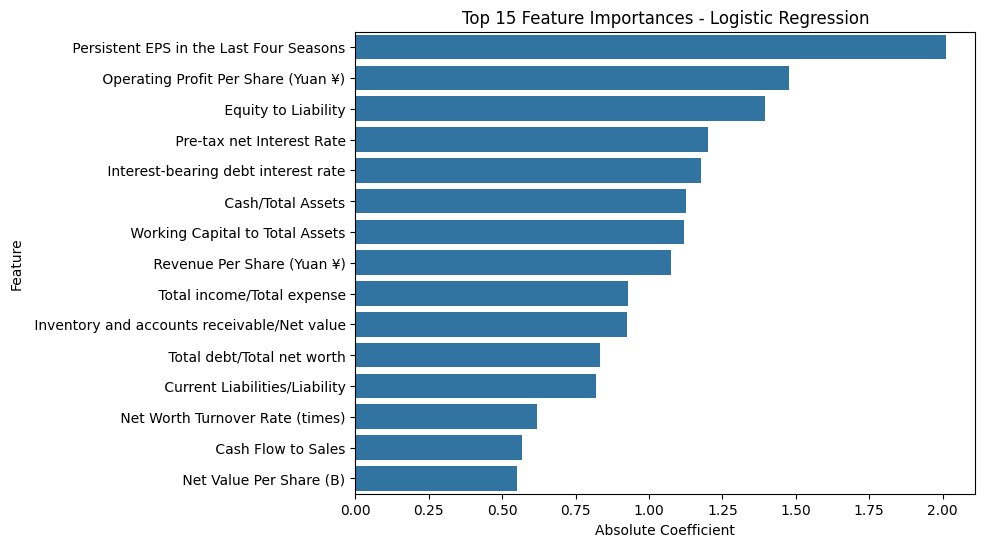

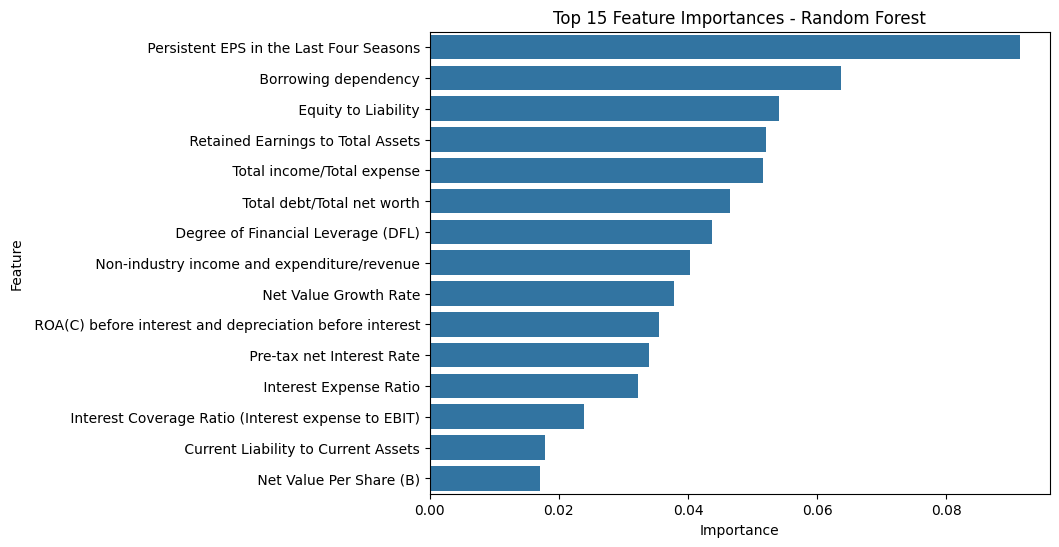

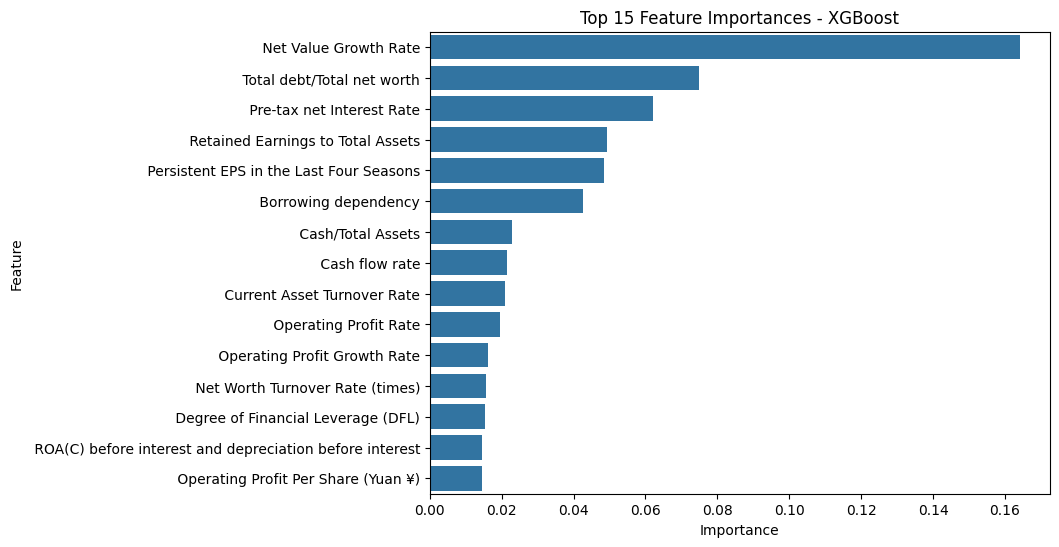

In [199]:
# Logistic Regression (absolute coefficients)
coef = pd.Series(np.abs(lr.coef_[0]), index=x.columns).sort_values(ascending=False).head(15)
plt.figure(figsize=(8,6))
sns.barplot(x=coef.values, y=coef.index)
plt.title("Top 15 Feature Importances - Logistic Regression")
plt.xlabel("Absolute Coefficient")
plt.ylabel("Feature")
plt.show()

# Random Forest
rf_importances = pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False).head(15)
plt.figure(figsize=(8,6))
sns.barplot(x=rf_importances.values, y=rf_importances.index)
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# XGBoost
xgb_importances = pd.Series(xgb.feature_importances_, index=x.columns).sort_values(ascending=False).head(15)
plt.figure(figsize=(8,6))
sns.barplot(x=xgb_importances.values, y=xgb_importances.index)
plt.title("Top 15 Feature Importances - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()




# Firm Size Table


In [200]:


models = {
    "Logistic": lr,
    "Logistic SMOTE": lr_sm, 
    "RandomForest": rf,         
    "RandomForest SMOTE": rf_sm, 
    "XGBoost": xgb,      
    "XGBoost SMOTE": xgb_sm,   
    "KNN k=3": knn["3"],       
    "KNN k=3 SMOTE": knn_sm["3"],   
    "KNN k=99": knn["99"],   
    "KNN k=99 SMOTE": knn_sm["99"]   
    
}
results = []

for name, model in models.items():
    for group in ["Small", "Medium", "Large"]:
        mask = (size_test == group)
        x_sub = x_test_sc[mask]
        y_sub = y_test[mask]

        y_proba = model.predict_proba(x_sub)[:, 1]
        y_pred  = model.predict(x_sub)

        results.append({
            "Model": name,
            "Size Group": group,
            "AUC": roc_auc_score(y_sub, y_proba),
            "Recall": recall_score(y_sub, y_pred),
            "Precision": precision_score(y_sub, y_pred, zero_division=0),
            "F1": f1_score(y_sub, y_pred)
        })

size_performance = pd.DataFrame(results)
print(size_performance)



                 Model Size Group       AUC    Recall  Precision        F1
0             Logistic      Small  0.802915  0.529412   0.230769  0.321429
1             Logistic     Medium  0.890763  0.666667   0.150000  0.244898
2             Logistic      Large  0.923170  0.666667   0.160000  0.258065
3       Logistic SMOTE      Small  0.786765  0.529412   0.230769  0.321429
4       Logistic SMOTE     Medium  0.896118  0.666667   0.166667  0.266667
5       Logistic SMOTE      Large  0.921347  0.666667   0.184615  0.289157
6         RandomForest      Small  0.911502  0.058824   1.000000  0.111111
7         RandomForest     Medium  0.875636  0.000000   0.000000  0.000000
8         RandomForest      Large  0.897216  0.166667   1.000000  0.285714
9   RandomForest SMOTE      Small  0.927127  0.235294   0.571429  0.333333
10  RandomForest SMOTE     Medium  0.861981  0.333333   0.272727  0.300000
11  RandomForest SMOTE      Large  0.903294  0.166667   0.166667  0.166667
12             XGBoost   

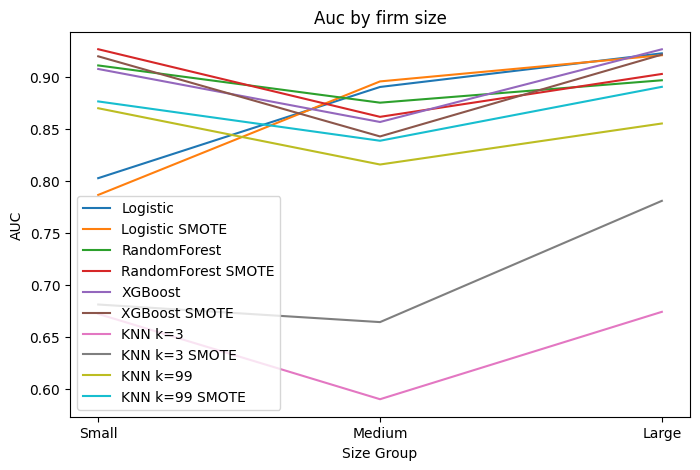

In [201]:

plt.figure(figsize=(8,5))
for model in size_performance["Model"].unique():
    subset = size_performance[size_performance["Model"] == model]
    plt.plot(subset["Size Group"], subset["AUC"], label=model)

plt.title("Auc by firm size")
plt.ylabel("AUC")
plt.xlabel("Size Group")
plt.legend()
plt.show()


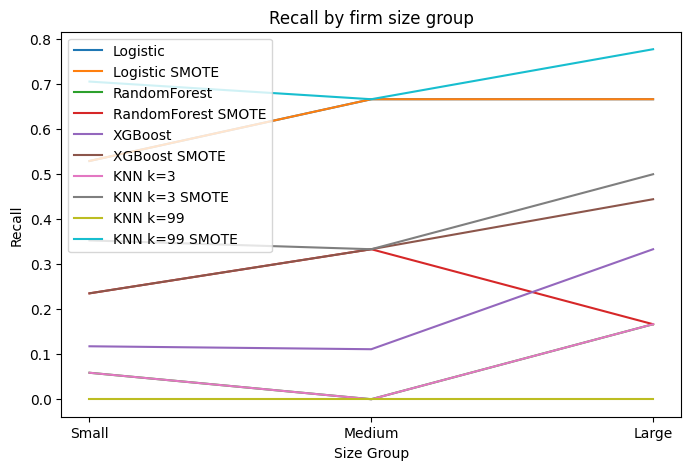

In [202]:
plt.figure(figsize=(8,5))
for model in size_performance["Model"].unique():
    subset = size_performance[size_performance["Model"] == model]
    plt.plot(subset["Size Group"], subset["Recall"], label=model)

plt.title("Recall by firm size group")
plt.ylabel("Recall")
plt.xlabel("Size Group")
plt.legend()
plt.show()


# SMOTE Effect
 

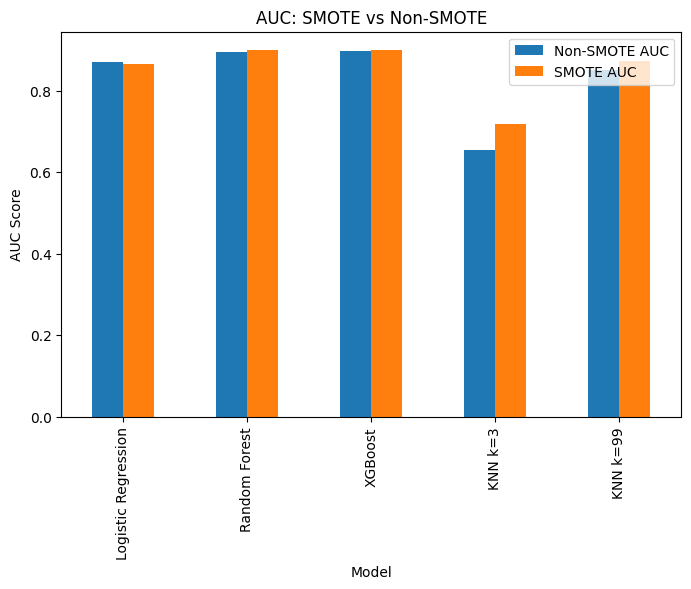

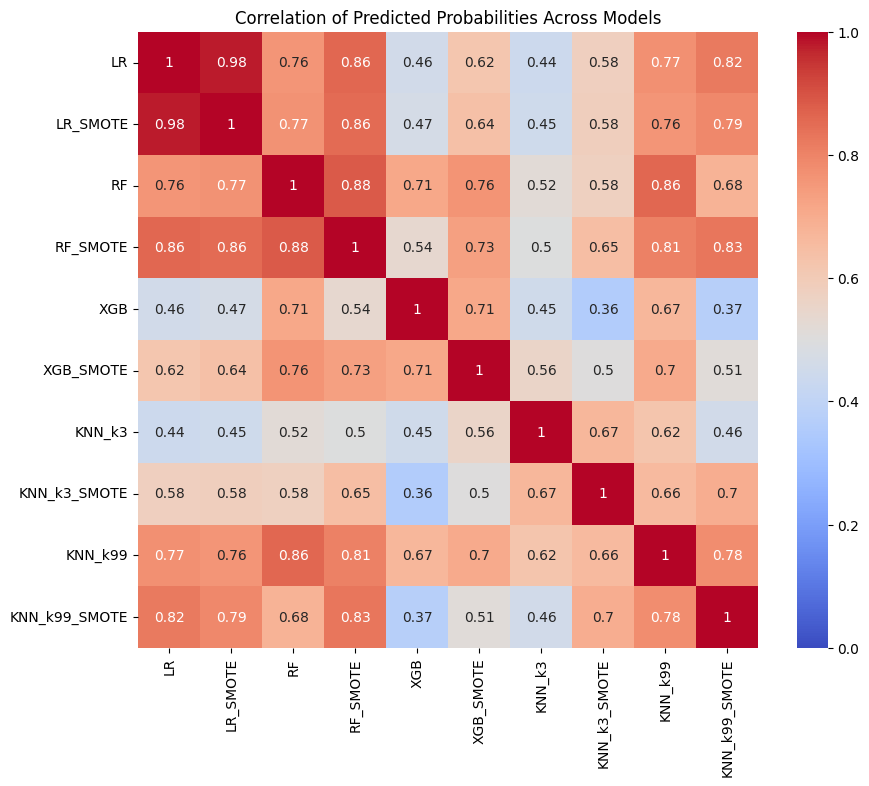

In [203]:
smote_metrics = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost", "KNN k=3", "KNN k=99"],
    "Non-SMOTE AUC": [
        roc_auc_score(y_test, lr.predict_proba(x_test_sc)[:,1]),
        roc_auc_score(y_test, rf.predict_proba(x_test_sc)[:,1]),
        roc_auc_score(y_test, xgb.predict_proba(x_test_sc)[:,1]),
        roc_auc_score(y_test, knn["3"].predict_proba(x_test_sc)[:,1]),
        roc_auc_score(y_test, knn["99"].predict_proba(x_test_sc)[:,1])
    ],
    "SMOTE AUC": [
        roc_auc_score(y_test, lr_sm.predict_proba(x_test_sc)[:,1]),
        roc_auc_score(y_test, rf_sm.predict_proba(x_test_sc)[:,1]),
        roc_auc_score(y_test, xgb_sm.predict_proba(x_test_sc)[:,1]),
        roc_auc_score(y_test, knn_sm["3"].predict_proba(x_test_sc)[:,1]),
        roc_auc_score(y_test, knn_sm["99"].predict_proba(x_test_sc)[:,1])
    ]
})

smote_metrics.set_index("Model", inplace=True)
smote_metrics.plot(kind="bar", figsize=(8,5))
plt.title("AUC: SMOTE vs Non-SMOTE")
plt.ylabel("AUC Score")
plt.show()

# Collect predicted probabilities
pred_probs = pd.DataFrame({
    "LR": lr.predict_proba(x_test_sc)[:,1],
    "LR_SMOTE": lr_sm.predict_proba(x_test_sc)[:,1],
    "RF": rf.predict_proba(x_test_sc)[:,1],
    "RF_SMOTE": rf_sm.predict_proba(x_test_sc)[:,1],
    "XGB": xgb.predict_proba(x_test_sc)[:,1],
    "XGB_SMOTE": xgb_sm.predict_proba(x_test_sc)[:,1],
    "KNN_k3": knn["3"].predict_proba(x_test_sc)[:,1],
    "KNN_k3_SMOTE": knn_sm["3"].predict_proba(x_test_sc)[:,1],
    "KNN_k99": knn["99"].predict_proba(x_test_sc)[:,1],
    "KNN_k99_SMOTE": knn_sm["99"].predict_proba(x_test_sc)[:,1],
})

plt.figure(figsize=(10,8))
sns.heatmap(pred_probs.corr(), annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Correlation of Predicted Probabilities Across Models")
plt.show()



<Axes: xlabel='Model'>

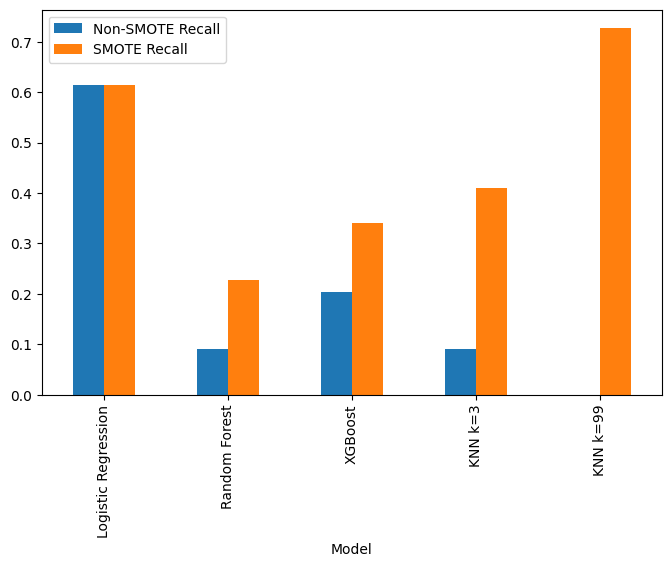

In [204]:
smote_metrics_recall = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost", "KNN k=3", "KNN k=99"],
    
    # NO SMOTE
    "Non-SMOTE Recall": [
        recall_score(y_test, lr.predict(x_test_sc)),
        recall_score(y_test, rf.predict(x_test_sc)),
        recall_score(y_test, xgb.predict(x_test_sc)),
        recall_score(y_test, knn["3"].predict(x_test_sc)),
        recall_score(y_test, knn["99"].predict(x_test_sc)),
    ],
    
    # WITH SMOTE
    "SMOTE Recall": [
        recall_score(y_test, lr_sm.predict(x_test_sc)),
        recall_score(y_test, rf_sm.predict(x_test_sc)),
        recall_score(y_test, xgb_sm.predict(x_test_sc)),
        recall_score(y_test, knn_sm["3"].predict(x_test_sc)),
        recall_score(y_test, knn_sm["99"].predict(x_test_sc)),
    ],
})

smote_metrics_recall.set_index("Model", inplace=True)
smote_metrics_recall.plot(kind="bar", figsize=(8,5))



### Classical model analysis

This is a Function for the threshold analysis for the Altman-Z and Ohlson-O score

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score


def threshold_analysis(
    y_true,
    scores,
    model_name,
    n_thresholds=100,
    lower_pct=1,
    upper_pct=99
):
    """
    Computes precision, recall and F1 across thresholds
    and plots metric–threshold curves with optimal F1 marked.
    """

    # Threshold grid
    thresholds = np.linspace(
        np.percentile(scores, lower_pct),
        np.percentile(scores, upper_pct),
        n_thresholds
    )

    rows = []
    for t in thresholds:
        y_pred = (scores >= t).astype(int)

        rows.append({
            "Threshold": t,
            "Recall": recall_score(y_true, y_pred, zero_division=0),
            "Precision": precision_score(y_true, y_pred, zero_division=0),
            "F1": f1_score(y_true, y_pred, zero_division=0),
            "Positive Rate": y_pred.mean()
        })

    df_thresh = pd.DataFrame(rows)

    # Find best F1 threshold
    best_idx = df_thresh["F1"].idxmax()
    best_thresh = df_thresh.loc[best_idx, "Threshold"]

    # Plot mertrics
    plt.figure()
    plt.plot(df_thresh["Threshold"], df_thresh["Recall"], label="Recall")
    plt.plot(df_thresh["Threshold"], df_thresh["Precision"], label="Precision")
    plt.plot(df_thresh["Threshold"], df_thresh["F1"], label="F1-score")

    plt.xlabel("Threshold")
    plt.ylabel("Metric value")
    plt.title(f"{model_name}: Metrics vs Threshold")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot  best F1 highlighted
    plt.figure()
    plt.plot(df_thresh["Threshold"], df_thresh["Recall"], label="Recall")
    plt.plot(df_thresh["Threshold"], df_thresh["Precision"], label="Precision")
    plt.plot(df_thresh["Threshold"], df_thresh["F1"], label="F1-score")

    plt.axvline(
        best_thresh,
        color="black",
        linestyle="--",
        label=f"Best F1 threshold = {best_thresh:.2f}"
    )

    plt.xlabel("Threshold")
    plt.ylabel("Metric value")
    plt.title(f"{model_name}: Optimal F1 Operating Point")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"{model_name} | Best F1 threshold: {best_thresh:.3f}")

    return df_thresh, best_thresh

    y_true = y.values


For the Altman-Z score:

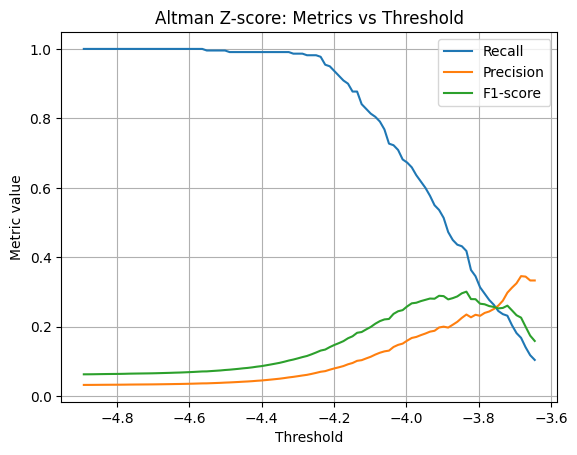

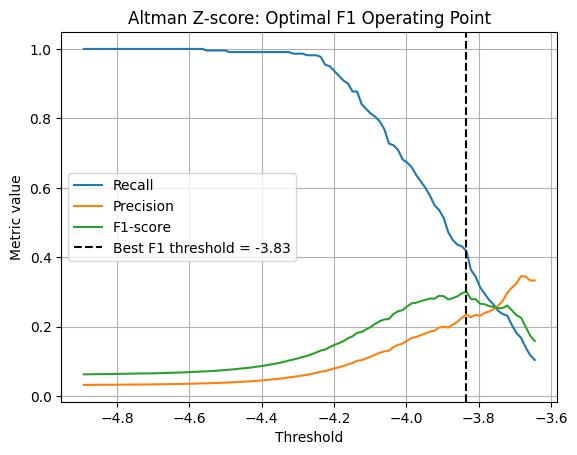

Altman Z-score | Best F1 threshold: -3.834


In [206]:
y_true = y.values

# Altman Z-score
z_df, z_best_thresh = threshold_analysis(
    y_true=y_true,
    scores=df["Z-score"].values,
    model_name="Altman Z-score"
)

For the Ohlson-O score

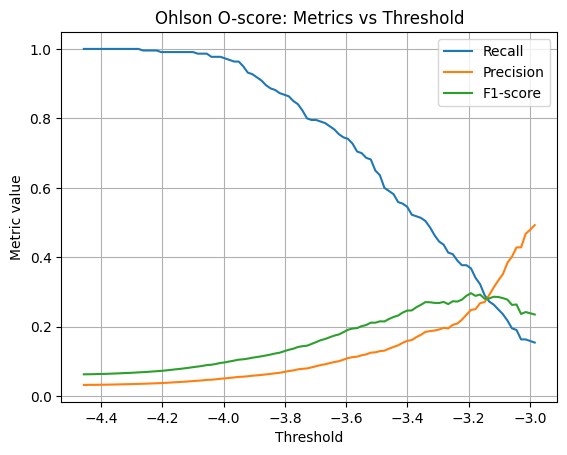

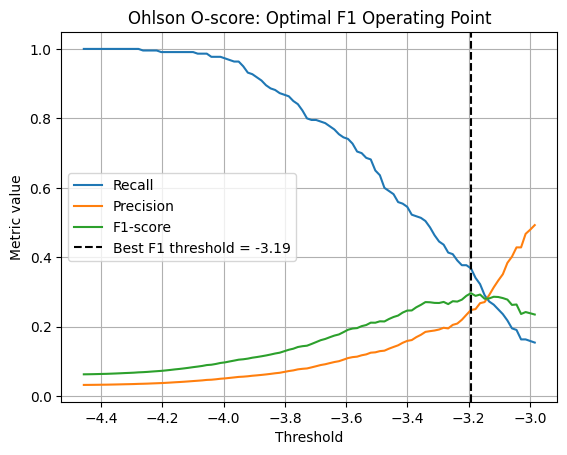

Ohlson O-score | Best F1 threshold: -3.192


In [207]:
# Ohlson O-score
o_df, o_best_thresh = threshold_analysis(
    y_true=y_true,
    scores=df["O-score"].values,
    model_name="Ohlson O-score"
)

Unlike machine learning classifiers, accounting-based distress scores require explicit threshold selection. By examining precision–recall trade-offs across thresholds, we demonstrate that Altman Z and Ohlson O support multiple operational regimes, ranging from high-recall early warning systems to conservative high-precision screening tools